# Calculate the forcing at the top of the atmosphere(TOA) due to anthropogenic aerosols
### Data used: MPI-ESM1.2

## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib.colors import from_levels_and_colors
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import sys
sys.path.append('../scripts')
from forcing_MPI_ESM1_2 import RadiativeFluxData

%matplotlib inline

## Initialize data

In [62]:
# Load netcdf data
if __name__ == '__main__':

    # create RadiativeFluxData class
    RFD = RadiativeFluxData()
    RFD.read()

# Compute radiative balance and forcing at toa

## For all sky data

### using only shortwave fluxes

In [55]:
sw_balance_aer = RFD.rsdt_aer - RFD.rsut_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
sw_balance_control = RFD.rsdt_c - RFD.rsut_c  #control- without anthro aerosols

sw_forcing_toa = -sw_balance_control + sw_balance_aer 

### using shortwave fluxes and outgoing longwave flux at toa

In [56]:
balance_aer = RFD.rsdt_aer - RFD.rsut_aer - RFD.rlut_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
balance_control = RFD.rsdt_c - RFD.rsut_c - RFD.rlut_c  #control- without anthro aerosols

forcing_toa = -balance_control + balance_aer 

## Setup for plot colours and levels

In [24]:
# define a colorbar to control the gradient of colours in asymmetric colourbar and introduce white colour for zero values.
# matplotlib colorbar does not represent the actual weighting of the values in the colourbar given the asymmetry so use absolute values

#levels = [-12, -10, -8, -6, -4, -2, -0.5, 0.5, 2, 4] 
#colors = ['#053061','#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white',  '#fae7dc','#f7b799']

#levels1 = [-10, -8, -6, -4, -2, -0.5, 0.5, 2] 
#colors1 = ['#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white',  '#fae7dc']

#levels3 = [ -4.5, -3,-1.5, -0.5, 0.5, 1.5, 3, 4.5] 
#colors3 = ['#7cb7d7','#bad9e9','#e6eff4','white',  '#fae7dc','#f7b799', '#f5a987']

#adjust colours and levels and ticks as follows:
#ax.contourf(colors=colors, levels=levels)
#plt.colorbar(ticks=range(start,stop,step)) eg. range(-14,4,2)

In [39]:
colors = ['#053061','#1b5a9b','#337eb8','#5ba2cb','#97c7df','#c7e0ed','#e8f0f4','white','#f9ece5','#fcd3bc']
levels = [-14, -12, -10, -8, -6, -4, -2, -0.1, 0.1, 2, 4] 

colors3 = ['#bddbea', '#d9e9f1','#edf2f5', 'white','#f9f0ea','#fce1d1','#facab1','#f5ae8d','#e98c6e','#d96753','#c7423f']
levels3 = [-1.2, -0.8, -0.4, -0.1, 0.1, 0.4, 0.8, 1.2, 1.6, 2.0, 2.4]

In [ ]:
#Obtaining the colours from RdBu_r to use in the code above. From: https://stackoverflow.com/questions/33596491/extract-matplotlib-colormap-in-hex-format
from pylab import *

cmap = cm.get_cmap('RdBu_r', 20)    # PiYG

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

In [6]:
# Notes: add_cyclic_point throws out an error due to continuous mapping of the longitude each time it's used. 
# And so does the TwoSlopeNorm or the diverging Norm
# Hack: re-run class code to load the data each time before plotting a new map or correcting the colorbar
# ^still bloody annoying. Need to fix asap

# contourf renders the colourbar into discrete ranges. Can I get a continuos range instead?

## Visualization

###  Radiative balance at TOA 

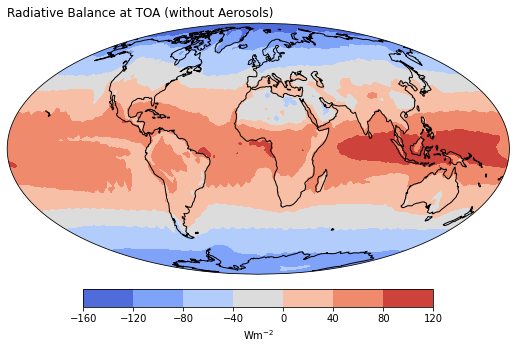

In [7]:
# Visualize simulated global historical data without anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide()) #central_longitude=160
ax.set_global()
ax.coastlines()
balance_control, RFD.lon = add_cyclic_point(balance_control, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(balance_control,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs,shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (without Aerosols)", loc='left', fontsize=12)
plt.show()
#plt.savefig("bal_control_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

Text(0.0, 1.0, 'Radiative Balance at TOA (with Aerosols)')

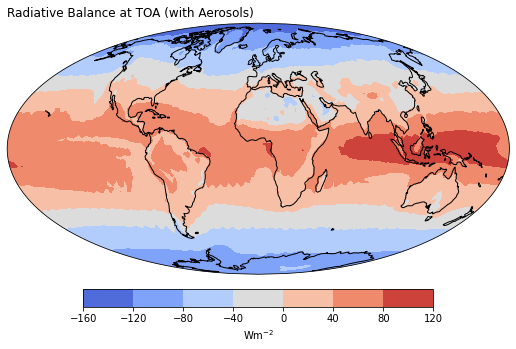

In [10]:
# Visualize simulated global historical data with anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax1.set_global()
ax1.coastlines()
balance_aer, RFD.lon = add_cyclic_point(balance_aer, coord=RFD.lon) #removes white longitutdinal line at centre
cs1 = ax1.contourf(RFD.lon,RFD.lat, np.mean(balance_aer,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs1, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (with Aerosols)", loc='left', fontsize=12)
#plt.savefig("bal_Aer_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Radiative forcing at TOA

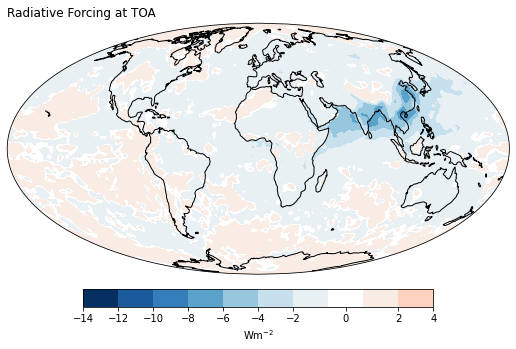

In [47]:
#Visualize radiaitve forcing at TOA with longwave radiation
vmax = np.max(np.mean(forcing_toa,axis=0))
vmin = np.min(np.mean(forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] ) #for representative intensity at boundary values for diverging colormaps
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #push zero as mid point of red and blue
N = 9
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
forcing_toa, RFD.lon = add_cyclic_point(forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(forcing_toa,axis=0),norm=norm, transform=ccrs.PlateCarree(), colors=colors,levels=levels)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Radiative Forcing at TOA", loc='left', fontsize = 12)
plt.savefig("comp_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Radiative forcing with only shortwave radiation

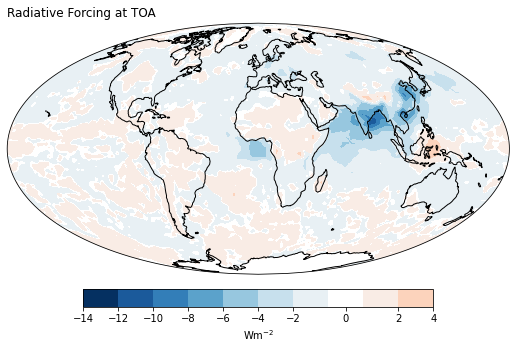

In [51]:
vmax = np.max(np.mean(sw_forcing_toa,axis=0))
vmin = np.min(np.mean(sw_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #set zero value to white colour

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
sw_forcing_toa, RFD.lon = add_cyclic_point(sw_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
contour_map =  ax.contourf(RFD.lon,RFD.lat,np.mean(sw_forcing_toa,axis=0),transform=ccrs.PlateCarree(),norm=norm, colors=colors,levels=levels)
plt.colorbar(contour_map, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Radiative Forcing at TOA", loc='left', fontsize = 12)
plt.savefig("comp_sw_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Difference between the two forcings

Text(0.0, 1.0, 'Difference in Radiative Forcing at TOA')

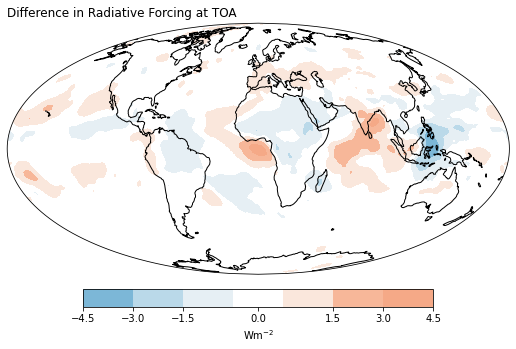

In [24]:
diff_forcing_toa = forcing_toa - sw_forcing_toa 

vmax = np.max(np.mean(diff_forcing_toa,axis=0))
vmin = np.min(np.mean(diff_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) 

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
diff_forcing_toa, RFD.lon = add_cyclic_point(diff_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre

cs = ax.contourf(RFD.lon,RFD.lat,np.mean(diff_forcing_toa,axis=0), transform=ccrs.PlateCarree(), norm=norm, colors=colors3,levels=levels3)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[ -4.5,-3, -1.5, 0, 1.5,3, 4.5])
plt.title("Difference in Radiative Forcing at TOA", loc='left', fontsize = 12)
#plt.savefig("diff_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

## For clear sky data

In [57]:
cs_sw_balance_aer = RFD.rsdt_aer - RFD.rsutcs_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
cs_sw_balance_control = RFD.rsdt_c - RFD.rsutcs_c  #control- without anthro aerosols

cs_sw_forcing_toa = -cs_sw_balance_control + cs_sw_balance_aer 

cs_balance_aer = RFD.rsdt_aer - RFD.rsutcs_aer - RFD.rlutcs_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
cs_balance_control = RFD.rsdt_c - RFD.rsutcs_c - RFD.rlutcs_c  #control- without anthro aerosols

cs_forcing_toa = -cs_balance_control + cs_balance_aer 

### Radiative balance at TOA for clear sky

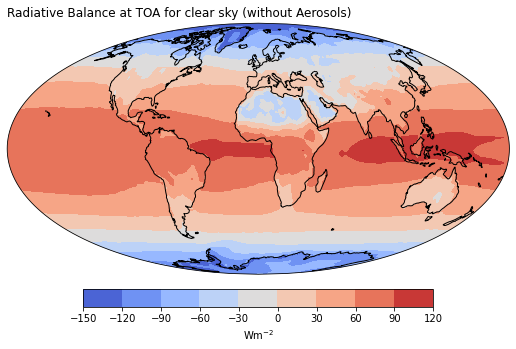

<Figure size 432x288 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide()) #central_longitude=160
ax.set_global()
ax.coastlines()
cs_balance_control, RFD.lon = add_cyclic_point(cs_balance_control, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(cs_balance_control,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs,shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA for clear sky (without Aerosols)", loc='left', fontsize=12)
plt.show()
plt.savefig("cs_bal_control_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

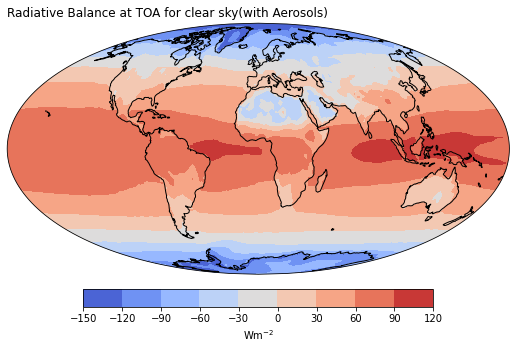

In [9]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax1.set_global()
ax1.coastlines()
cs_balance_aer, RFD.lon = add_cyclic_point(cs_balance_aer, coord=RFD.lon) #removes white longitutdinal line at centre
cs1 = ax1.contourf(RFD.lon,RFD.lat, np.mean(cs_balance_aer,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs1, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA for clear sky(with Aerosols)", loc='left', fontsize=12)
plt.savefig("cs_bal_Aer_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Shortwave radiative forcing

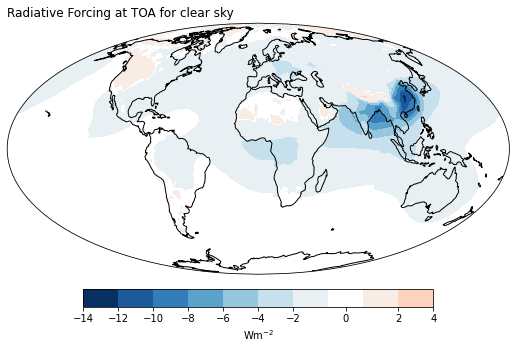

In [28]:
vmax = np.max(np.mean(cs_sw_forcing_toa,axis=0))
vmin = np.min(np.mean(cs_sw_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #set zero value to white colour

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
cs_sw_forcing_toa, RFD.lon = add_cyclic_point(cs_sw_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
contour_map =  ax.contourf(RFD.lon,RFD.lat,np.mean(cs_sw_forcing_toa,axis=0),transform=ccrs.PlateCarree(),norm=norm, colors=colors,levels=levels)
plt.colorbar(contour_map, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Radiative Forcing at TOA for clear sky", loc='left', fontsize = 12)
plt.savefig("cs_sw_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Longwave radiative forcing

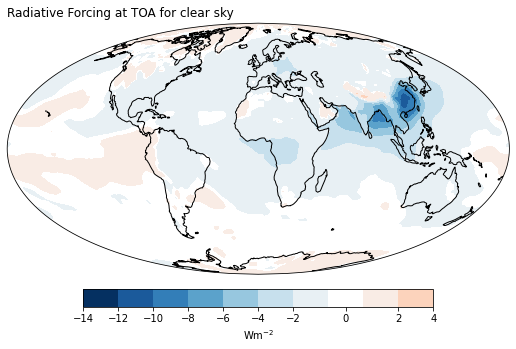

In [32]:
#Visualize radiaitve forcing at TOA with longwave radiation
vmax = np.max(np.mean(cs_forcing_toa,axis=0))
vmin = np.min(np.mean(cs_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] ) #for representative intensity at boundary values for diverging colormaps
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #push zero as mid point of red and blue

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
cs_forcing_toa, RFD.lon = add_cyclic_point(cs_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(cs_forcing_toa,axis=0),norm=norm, transform=ccrs.PlateCarree(), colors=colors,levels=levels)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14,-12,-10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Radiative Forcing at TOA for clear sky", loc='left', fontsize = 12)
plt.savefig("cs_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

### Difference in forcing

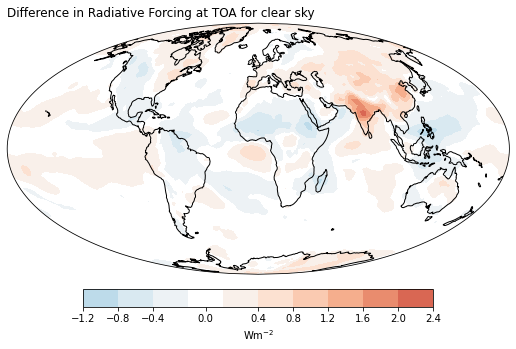

In [43]:
cs_diff_forcing_toa = cs_forcing_toa - cs_sw_forcing_toa 

vmax = np.max(np.mean(cs_diff_forcing_toa,axis=0))
vmin = np.min(np.mean(cs_diff_forcing_toa,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) 

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
cs_diff_forcing_toa, RFD.lon = add_cyclic_point(cs_diff_forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre

cs = ax.contourf(RFD.lon,RFD.lat,np.mean(cs_diff_forcing_toa,axis=0), transform=ccrs.PlateCarree(), norm=norm, colors=colors3,levels=levels3)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[ -1.2,-0.8,-0.4, 0.0,0.4,0.8,1.2,1.6,2.0,2.4])
plt.title("Difference in Radiative Forcing at TOA for clear sky", loc='left', fontsize = 12)
plt.savefig("cs_diff_forcing_TOA_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

## Difference between clear sky and all sky

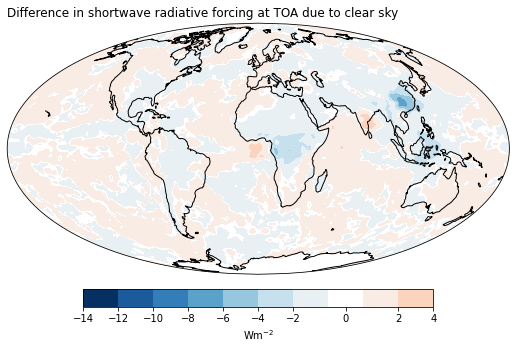

In [61]:
sw_diff = cs_sw_forcing_toa - sw_forcing_toa

vmax = np.max(np.mean(sw_diff,axis=0))
vmin = np.min(np.mean(sw_diff,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #set zero value to white colour

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
sw_diff, RFD.lon = add_cyclic_point(sw_diff, coord=RFD.lon) #removes white longitutdinal line at centre
contour_map =  ax.contourf(RFD.lon,RFD.lat,np.mean(sw_diff,axis=0),transform=ccrs.PlateCarree(),norm=norm, colors=colors,levels=levels)
plt.colorbar(contour_map, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Difference in shortwave radiative forcing at TOA due to clear sky", loc='left', fontsize = 12)
plt.savefig("diff_sw_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)

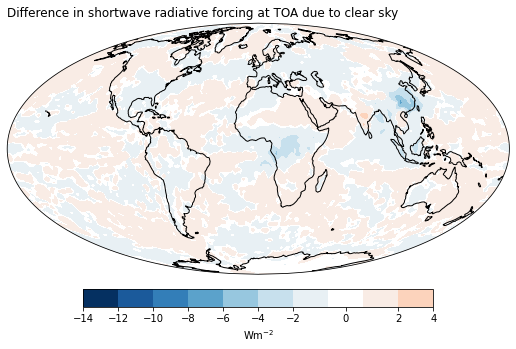

In [63]:
lw_diff = cs_forcing_toa - forcing_toa

vmax = np.max(np.mean(lw_diff,axis=0))
vmin = np.min(np.mean(lw_diff,axis=0))
v_ext = np.max( [ np.abs(vmin), np.abs(vmax) ] )
norm = mcolors.TwoSlopeNorm(vmin=-v_ext, vmax = v_ext, vcenter=0) #set zero value to white colour

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
lw_diff, RFD.lon = add_cyclic_point(lw_diff, coord=RFD.lon) #removes white longitutdinal line at centre
contour_map =  ax.contourf(RFD.lon,RFD.lat,np.mean(lw_diff,axis=0),transform=ccrs.PlateCarree(),norm=norm, colors=colors,levels=levels)
plt.colorbar(contour_map, shrink=0.8, fraction=0.046, pad=0.04, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal', ticks=[-14, -12, -10, -8, -6, -4, -2, 0, 2, 4])
plt.title("Difference in shortwave radiative forcing at TOA due to clear sky", loc='left', fontsize = 12)
plt.savefig("diff_lw_MPI-ESM1-2.pdf", bbox_inches='tight', transparent=True)